# Implementing Perceptron Learning 

## Part 1 - AND gate

**Impoting necessary libraries and datasets**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Initializing data**

In [2]:
data = np.array([[0,0,0],
        [0,1,0],
        [1,0,0],
        [1,1,1]])

num_of_datapoints = data.shape[0]
num_of_dimensions = data.shape[1]-1

num_of_dimensions

2

**Initializing weights and bias**

In [3]:
W = np.random.random_sample(size=num_of_dimensions)
b = np.random.random()

print("Initial Weights : {}".format(W))
print("Initial Bias : {}".format(b))
W.shape


Initial Weights : [0.51220191 0.18806016]
Initial Bias : 0.775239877261148


(2,)

**Performing perceptron learning**

In [4]:
eeta = 0.1
epochs = 50

for i in range(epochs):
    for j in range(num_of_datapoints):
        n = np.dot(W,data[j,0:num_of_dimensions]) + b
        a = n >= 0
        t = data[j,num_of_dimensions]
        e = t - a
        
        W += (eeta*e*data[j,0:num_of_dimensions].T)
        b += (eeta*e)
        
print("Final Weights : {}".format(W))
print("Final Bias : {}".format(b))

Final Weights : [0.21220191 0.08806016]
Final Bias : -0.22476012273885196


**Making Prediction**

In [5]:
prediction = (np.dot(data[:,0:num_of_dimensions],W) + b) >= 0
prediction

score = 0
results = prediction == data[:,num_of_dimensions]

for result in results:
    score += result

score = score*100/num_of_datapoints
print("Score = {}%".format(score))

Score = 100.0%


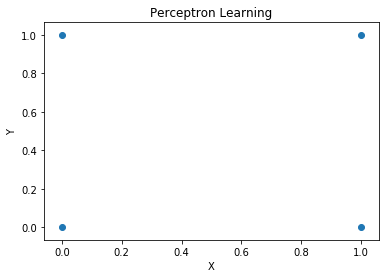

In [6]:
plt.title("Perceptron Learning")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(data[:,0],data[:,1])

## Part 2 - Iris dataset

**Impoting necessary libraries and datasets**

In [7]:
from sklearn import datasets,metrics,model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
X,y = datasets.load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,stratify=y,random_state=1)

In [9]:
# clf = MLPClassifier(solver='sgd',hidden_layer_sizes=65,max_iter=10000)
# clf.fit(X_train,y_train)
# accuracy = 0.97

# param_grid = {'activation':['identity','logistic','tanh','relu'],
#               'learning_rate' : ['constant','invscaling','adaptive'],
#               'solver' : ['lbfgs','sgd','adam'],
#               'alpha' : [0.0001,0.01,0.1],
#               'max_iter' : [5000,8000,10000]}

param_grid = {'activation':['logistic','relu'],
              'learning_rate' : ['constant','adaptive'],
              'solver' : ['sgd','adam'],
              'alpha' : [0.0001,0.01,0.1],
              'max_iter' : [5000,8000,10000]}

clf = MLPClassifier()
clf_gs = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)
clf_gs.fit(X_train,y_train)    
clf_gs.best_estimator_      

/Users/ishan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
prediction = clf_gs.predict(X_test)

In [12]:
prediction

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2])

In [13]:
metrics.accuracy_score(y_true=y_test, y_pred=prediction)

1.0

In [14]:
print(metrics.classification_report(y_true=y_test,y_pred=prediction))
print(metrics.confusion_matrix(y_true=y_test,y_pred=prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]
